导入的数据表1:
   情况  零配件1次品率  零配件1购买单价  零配件1检测成本  零配件2次品率  零配件2购买单价  零配件2检测成本  成品次品率  \
0   1     0.10         4         2     0.10        18         3   0.10   
1   2     0.20         4         2     0.20        18         3   0.20   
2   3     0.10         4         2     0.10        18         3   0.10   
3   4     0.20         4         1     0.20        18         1   0.20   
4   5     0.10         4         8     0.20        18         1   0.10   
5   6     0.05         4         2     0.05        18         3   0.05   

   成品装配成本  成品检测成本  不合格成品调换损失  不合格成品拆解费用  
0       6       3         56          5  
1       6       3         56          5  
2       6       3         56         30  
3       6       2         56         30  
4       6       1         56         10  
5       6       3         56         40  

每种情况的最优决策方案及最小总成本:
    情况  检测零配件1  检测零配件2   检测成品  拆解不合格成品  最小总成本
0  1.0   False   False   True     True   19.6
1  2.0   False   False   True     True   25.2
2  3.0   False   Fal

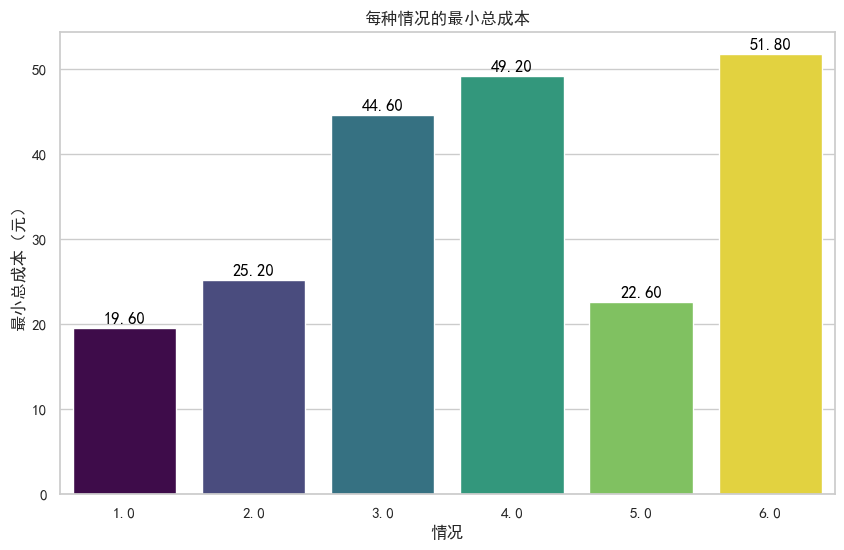

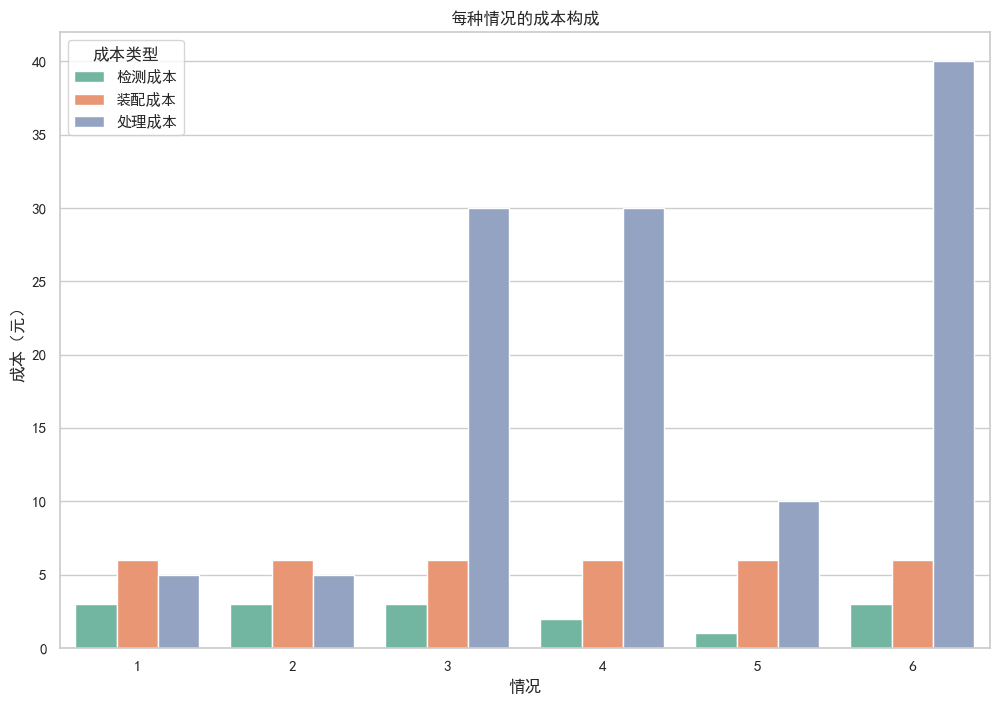

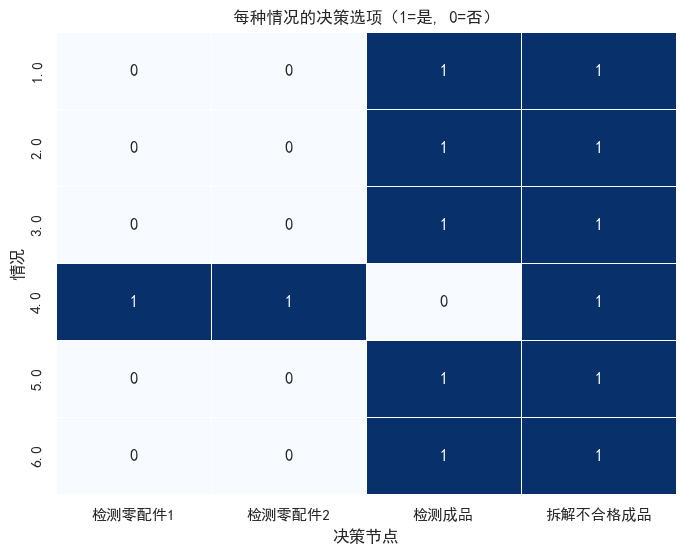

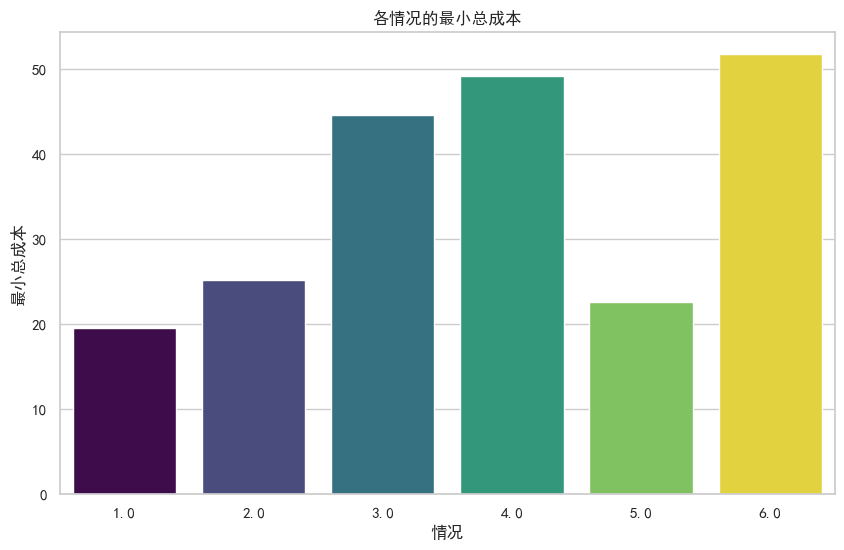

各情况的成本和最佳选择：
   情况  零配件1次品率  零配件1购买单价  零配件1检测成本  零配件2次品率  零配件2购买单价  零配件2检测成本  成品次品率  \
0   1     0.10         4         2     0.10        18         3   0.10   
1   2     0.20         4         2     0.20        18         3   0.20   
2   3     0.10         4         2     0.10        18         3   0.10   
3   4     0.20         4         1     0.20        18         1   0.20   
4   5     0.10         4         8     0.20        18         1   0.10   
5   6     0.05         4         2     0.05        18         3   0.05   

   成品装配成本  成品检测成本  不合格成品调换损失  不合格成品拆解费用  检测成本  装配成本  处理成本  最小总成本 最佳选择  
0       6       3         56          5     3     6     5   19.6   其他  
1       6       3         56          5     3     6     5   25.2   其他  
2       6       3         56         30     3     6    30   44.6   其他  
3       6       2         56         30     2     6    30   49.2   其他  
4       6       1         56         10     1     6    10   22.6   其他  
5       6       3         56        

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product


# 设置绘图风格
sns.set(style="whitegrid")

# 定义表1的数据
data_table1 = {
    "情况": [1, 2, 3, 4, 5, 6],
    "零配件1次品率": [0.10, 0.20, 0.10, 0.20, 0.10, 0.05],
    "零配件1购买单价": [4, 4, 4, 4, 4, 4],
    "零配件1检测成本": [2, 2, 2, 1, 8, 2],
    "零配件2次品率": [0.10, 0.20, 0.10, 0.20, 0.20, 0.05],
    "零配件2购买单价": [18, 18, 18, 18, 18, 18],
    "零配件2检测成本": [3, 3, 3, 1, 1, 3],
    "成品次品率": [0.10, 0.20, 0.10, 0.20, 0.10, 0.05],
    "成品装配成本": [6, 6, 6, 6, 6, 6],
    "成品检测成本": [3, 3, 3, 2, 1, 3],
    "不合格成品调换损失": [56, 56, 56, 56, 56, 56],
    "不合格成品拆解费用": [5, 5, 30, 30, 10, 40],
}

df = pd.DataFrame(data_table1)
print("导入的数据表1:")
print(df)


def calc_defective_rate(parts_def_rates):
    """计算组合后的次品率"""
    good_rate = 1
    for rate in parts_def_rates:
        good_rate *= 1 - rate
    return 1 - good_rate


def calculate_total_cost(row, detect_part1, detect_part2, detect_final, disassemble):
    """
    计算总成本
    参数:
        row: DataFrame的一行数据
        detect_part1: 是否检测零配件1
        detect_part2: 是否检测零配件2
        detect_final: 是否检测成品
        disassemble: 是否拆解不合格成品
    返回:
        total_cost: 总成本
    """
    # 零配件成本
    cost_part1 = row["零配件1购买单价"]
    cost_part2 = row["零配件2购买单价"]

    # 检测成本
    detect_cost = 0
    if detect_part1:
        detect_cost += row["零配件1检测成本"]
    if detect_part2:
        detect_cost += row["零配件2检测成本"]
    if detect_final:
        detect_cost += row["成品检测成本"]

    # 装配成本
    assembly_cost = row["成品装配成本"]

    # 处理成本
    handling_cost = 0
    if disassemble:
        handling_cost += row["不合格成品拆解费用"]
    else:
        handling_cost += row["不合格成品调换损失"]

    # 计算次品率
    # 如果检测零配件，假设不合格零配件被剔除，次品率降低
    part1_def_rate = row["零配件1次品率"] if not detect_part1 else 0
    part2_def_rate = row["零配件2次品率"] if not detect_part2 else 0
    semi_def_rate = calc_defective_rate([part1_def_rate, part2_def_rate])

    # 成品次品率
    if detect_final:
        final_def_rate = row["成品次品率"]  # 假设检测后的次品率为给定值
    else:
        final_def_rate = calc_defective_rate([semi_def_rate, row["成品次品率"]])

    # 计算总成本
    # 需要考虑成品次品带来的损失
    total_cost = (
        detect_cost
        + assembly_cost
        + handling_cost
        + (final_def_rate * row["不合格成品调换损失"])
    )

    return total_cost


# 定义所有可能的决策组合
# 决策选项
detect_options = [True, False]
disassemble_options = [True, False]

# 列表存储结果
results = []

# 遍历每种情况
for idx, row in df.iterrows():
    min_cost = float("inf")
    best_decision = {}

    # 遍历所有可能的决策组合
    for detect_part1, detect_part2, detect_final, disassemble in product(
        detect_options, detect_options, detect_options, disassemble_options
    ):
        total_cost = calculate_total_cost(
            row, detect_part1, detect_part2, detect_final, disassemble
        )
        if total_cost < min_cost:
            min_cost = total_cost
            best_decision = {
                "检测零配件1": detect_part1,
                "检测零配件2": detect_part2,
                "检测成品": detect_final,
                "拆解不合格成品": disassemble,
                "最小总成本": total_cost,
            }

    # 添加到结果列表
    result = {"情况": row["情况"]}
    result.update(best_decision)
    results.append(result)

# 转换为DataFrame
results_df = pd.DataFrame(results)
print("\n每种情况的最优决策方案及最小总成本:")
print(results_df)


# 定义函数计算各部分成本
def breakdown_cost(row):
    # 计算各部分成本
    detect_cost = 0
    detect_cost += (
        df.loc[df["情况"] == row["情况"], "零配件1检测成本"].values[0]
        if row["检测零配件1"]
        else 0
    )
    detect_cost += (
        df.loc[df["情况"] == row["情况"], "零配件2检测成本"].values[0]
        if row["检测零配件2"]
        else 0
    )
    detect_cost += (
        df.loc[df["情况"] == row["情况"], "成品检测成本"].values[0]
        if row["检测成品"]
        else 0
    )

    assembly_cost = df.loc[df["情况"] == row["情况"], "成品装配成本"].values[0]

    handling_cost = (
        df.loc[df["情况"] == row["情况"], "不合格成品拆解费用"].values[0]
        if row["拆解不合格成品"]
        else df.loc[df["情况"] == row["情况"], "不合格成品调换损失"].values[0]
    )

    return pd.Series([detect_cost, assembly_cost, handling_cost])


# 应用函数
df_costs = df.copy()
df_costs[["检测成本", "装配成本", "处理成本"]] = results_df.apply(
    breakdown_cost, axis=1
)

# 添加最小成本到df_costs
df_costs = df_costs.merge(results_df[["情况", "最小总成本"]], on="情况")

# 解决中文乱码问题
# 替换字体为SimHei（黑体）
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决坐标轴负号显示问题


# 可视化最小总成本条形图
plt.figure(figsize=(10, 6))
# sns.barplot(x="情况", y="最小总成本", data=results_df, palette="viridis")
sns.barplot(
    x="情况",
    y="最小总成本",
    data=results_df,
    hue="情况",
    palette="viridis",
    legend=False,
)
plt.title("每种情况的最小总成本")
plt.xlabel("情况")
plt.ylabel("最小总成本（元）")
for index, row in results_df.iterrows():
    plt.text(
        row.name,
        row["最小总成本"] + 0.5,
        f"{row['最小总成本']:.2f}",
        color="black",
        ha="center",
    )
    # 保存图片
plt.savefig("最小总成本条形图.png")
plt.show()



# 可视化成本构成堆叠条形图
df_costs_melt = df_costs.melt(
    id_vars=["情况", "最小总成本"],
    value_vars=["检测成本", "装配成本", "处理成本"],
    var_name="成本类型",
    value_name="成本",
)

plt.figure(figsize=(12, 8))
sns.barplot(x="情况", y="成本", hue="成本类型", data=df_costs_melt, palette="Set2")
plt.title("每种情况的成本构成")
plt.xlabel("情况")
plt.ylabel("成本（元）")
plt.legend(title="成本类型")
#保存图片
plt.savefig("成本构成堆叠条形图.png")
plt.show()

# 创建决策选项的数值表示
decision_map = {True: 1, False: 0}

decision_df = results_df.copy()
decision_df["检测零配件1"] = decision_df["检测零配件1"].map(decision_map)
decision_df["检测零配件2"] = decision_df["检测零配件2"].map(decision_map)
decision_df["检测成品"] = decision_df["检测成品"].map(decision_map)
decision_df["拆解不合格成品"] = decision_df["拆解不合格成品"].map(decision_map)

# 设置索引为情况
decision_df.set_index("情况", inplace=True)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(
    decision_df.drop("最小总成本", axis=1),
    annot=True,
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    fmt="d",
)
plt.title("每种情况的决策选项（1=是, 0=否）")
plt.xlabel("决策节点")
plt.ylabel("情况")
#保存图片
plt.savefig("决策选项热力图.png")
plt.show()


# 可视化最小总成本条形图
plt.figure(figsize=(10, 6))
sns.barplot(
    x="情况",
    y="最小总成本",
    data=results_df,
    hue="情况",
    palette="viridis",
    legend=False,
)
plt.title("各情况的最小总成本")
plt.xlabel("情况")
plt.ylabel("最小总成本")
#保存图片
plt.savefig("最小总成本条形图.png")
plt.show()



# 创建包含关键信息的表格
df_costs["最佳选择"] = np.where(
    df_costs["最小总成本"]
    == df_costs[["检测成本", "装配成本", "处理成本"]].min(axis=1),
    "最小总成本",
    "其他",
)

# 打印表格
print("各情况的成本和最佳选择：")
print(df_costs)

# 保存结果
results_df.to_excel("results.xlsx", index=False)
